<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/CodeExamples/GPlecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline

pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


In [0]:
t = np.arange(100)

In [0]:
np.random.seed(123)
y = np.random.randn(100) + np.sin( t * np.pi / 10) 

Text(0, 0.5, 'y')

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


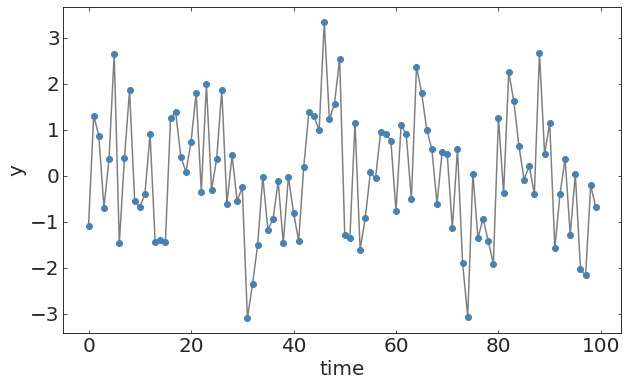

In [12]:
pl.plot(t, y, "k-", alpha=0.5)
pl.plot(t, y, "o")

pl.xlabel("time")
pl.ylabel("y")

In [0]:
def get_stats(x, y):
  print ("mean: {:.2f}".format(np.nanmean(y)))
  print ("stdev: {:.2f}".format(np.nanstd(y)))
  print ("percentiles: \t0.05:\t{:.2f}\n\t\t0.25:\t{:.2f}\n\t\t0.5:\t{:.2f}\n\t\t0.75:\t{:.2f}\n\t\t0.95:\t{:.2f}\n".format(
      *np.array(np.nanpercentile(y, [5, 25, 50, 75, 95]))))   
  print("normality p-value {:.2}".format(sp.stats.normaltest(y[~np.isnan(y)])[1]))

In [14]:
get_stats(t, y)

mean: 0.03
stdev: 1.31
percentiles: 	0.05:	-1.92
		0.25:	-0.94
		0.5:	0.00
		0.75:	0.96
		0.95:	2.25

normality p-value 0.78


In [0]:
y_missing = y.copy()
indx = np.random.randint(0, 100, 5)
y_missing[indx] *= np.nan

Text(0, 0.5, 'y')

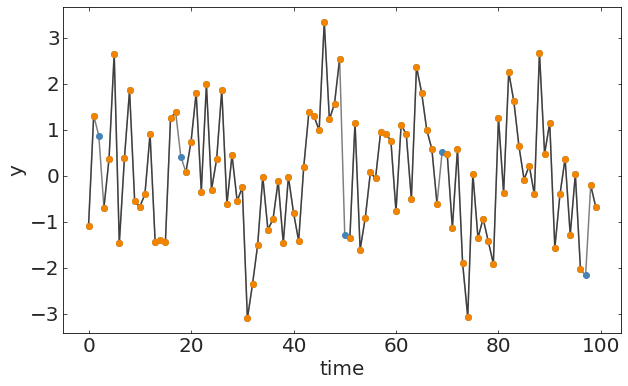

In [29]:
pl.plot(t, y, "k-", alpha=0.5)
pl.plot(t, y, "o")
pl.plot(t, y_missing, "k-", alpha=0.5)
pl.plot(t, y_missing, "o")

pl.xlabel("time")
pl.ylabel("y")

In [30]:
get_stats(t, y_missing)

mean: 0.05
stdev: 1.31
percentiles: 	0.05:	-1.91
		0.25:	-0.93
		0.5:	-0.02
		0.75:	0.99
		0.95:	2.28

normality p-value 0.79


In [0]:
y_limitesSensitivity = y.copy()
indx = y < -2
y_limitesSensitivity[indx] *= np.nan

mean: 0.16
stdev: 1.20
percentiles: 	0.05:	-1.49
		0.25:	-0.73
		0.5:	0.07
		0.75:	0.99
		0.95:	2.28

normality p-value 0.17


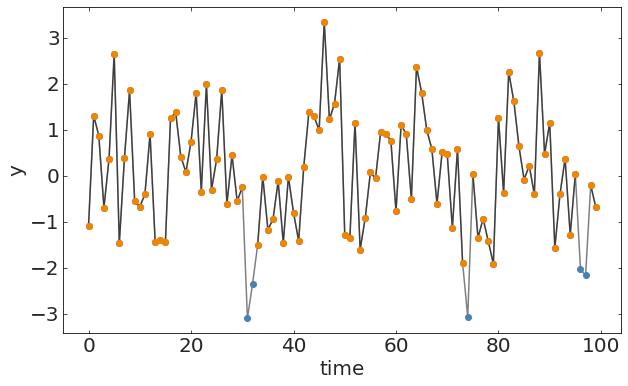

In [34]:
pl.plot(t, y, "k-", alpha=0.5)
pl.plot(t, y, "o")

pl.plot(t, y_limitesSensitivity, "k-", alpha=0.5)
pl.plot(t, y_limitesSensitivity, "o")

pl.xlabel("time")
pl.ylabel("y")

get_stats(t, y_limitesSensitivity)

In [0]:
y_censored = y.copy()
indx = y > 2
y_censored[indx] *= np.nan

mean: -0.14
stdev: 1.17
percentiles: 	0.05:	-1.96
		0.25:	-1.05
		0.5:	-0.07
		0.75:	0.84
		0.95:	1.68

normality p-value 0.26


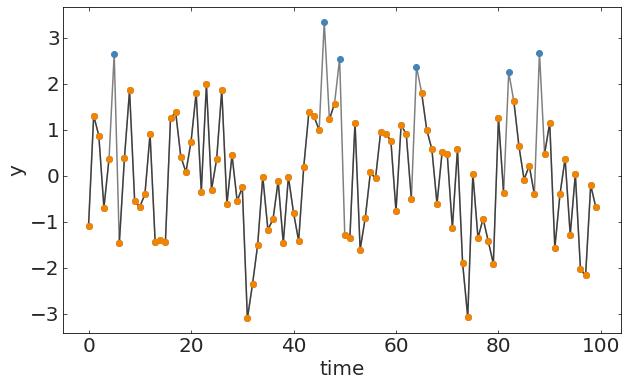

In [36]:
pl.plot(t, y, "k-", alpha=0.5)
pl.plot(t, y, "o")

pl.plot(t, y_censored, "k-", alpha=0.5)
pl.plot(t, y_censored, "o")

pl.xlabel("time")
pl.ylabel("y")

get_stats(t, y_censored)

In [0]:
df = pd.DataFrame.from_dict({'t':t, 'y':y, 'y_missing':y_missing,
                  'y_limitesSensitivity':y_limitesSensitivity,
                  'y_censored': y_censored}).set_index('t')

In [104]:
df["y_missing"].isna()

t
0     False
1     False
2      True
3     False
4     False
      ...  
95    False
96    False
97     True
98    False
99    False
Name: y_missing, Length: 100, dtype: bool

In [0]:
for i in df.index:
  if np.isnan(df.iloc[i]["y_missing"]):
    if i-1:
      df.iloc[i-1]["y_missing"] = np.nan
    if i-2:
      df.iloc[i-2]["y_missing"] = np.nan    
      

In [106]:
df.isna()

,y,y_missing,y_limitesSensitivity,y_censored
t,,,,
0,False,False,False,False
1,False,True,False,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
95,False,True,False,False
96,False,True,True,False
97,False,True,True,False


In [107]:
df.mean()

y                       0.027109
y_missing              -0.018973
y_limitesSensitivity    0.162738
y_censored             -0.139607
dtype: float64

In [108]:
df.sum()

y                        2.710907
y_missing               -1.631678
y_limitesSensitivity    15.460102
y_censored             -13.123103
dtype: float64

In [109]:
df.cumsum()

,y,y_missing,y_limitesSensitivity,y_censored
t,,,,
0,-1.085631,-1.085631,-1.085631,-1.085631
1,0.220732,NaN,0.220732,0.220732
2,1.091496,NaN,1.091496,1.091496
3,0.394218,-1.782908,0.394218,0.394218
4,0.766674,-1.410452,0.766674,0.766674
...,...,...,...,...
95,7.815598,NaN,16.356680,-8.018412
96,5.779974,NaN,NaN,-10.054037
97,3.607485,NaN,NaN,-12.226525


In [111]:
print ("droppinig schemes:")
print ("original shape", df.shape)
print ("drop only if all values are NaN, along rows", 
       df.dropna(how="all").shape)
print ("drop only if any value is NaN, along rows", 
       df.dropna(how="any").shape)
print ("drop only if any values are NaN, along rows",  
       df.dropna(how="any", axis=1).shape)

droppinig schemes:
original shape (100, 4)
drop only if all values are NaN, along rows (100, 4)
drop only if any value is NaN, along rows (78, 4)
drop only if any values are NaN, along rows (100, 1)


droppinig schemes:
original mean
 y                       0.027109
y_missing              -0.018973
y_limitesSensitivity    0.162738
y_censored             -0.139607
dtype: float64
original mean
 y                       1.317880
y_missing               1.308035
y_limitesSensitivity    1.202674
y_censored              1.171653
dtype: float64
padding mean
 y                       0.027109
y_missing              -0.053088
y_limitesSensitivity    0.131049
y_censored             -0.114966
dtype: float64
padding mean
 y                       1.317880
y_missing               1.295408
y_limitesSensitivity    1.191420
y_censored              1.156108
dtype: float64


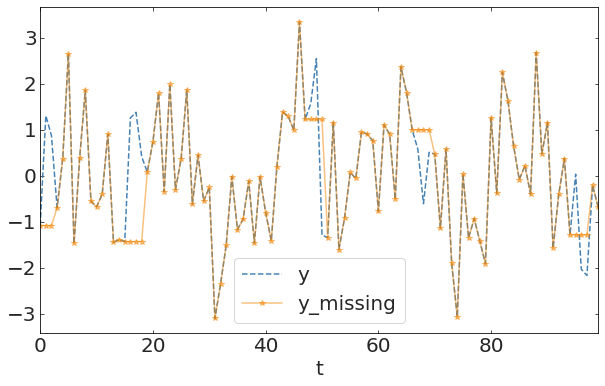

In [122]:
print ("droppinig schemes:")
print ("original mean\n", df.mean())
print ("original mean\n", df.std())


print ("padding mean\n", df.fillna(method='ffill').mean())
print ("padding mean\n", df.fillna(method='ffill').std())
# same as method='pad'

ax = df[["y"]].plot(style='--')
df[["y_missing"]].fillna(method='ffill').plot(ax=ax, style='*-', alpha=0.5)



filling schemes:
original mean
 y                       0.027109
y_missing              -0.018973
y_limitesSensitivity    0.162738
y_censored             -0.139607
dtype: float64
original mean
 y                       1.317880
y_missing               1.308035
y_limitesSensitivity    1.202674
y_censored              1.171653
dtype: float64
padding mean
 y                       0.027109
y_missing              -0.060580
y_limitesSensitivity    0.120653
y_censored             -0.107739
dtype: float64
padding mean
 y                       1.317880
y_missing               1.240413
y_limitesSensitivity    1.196232
y_censored              1.188272
dtype: float64


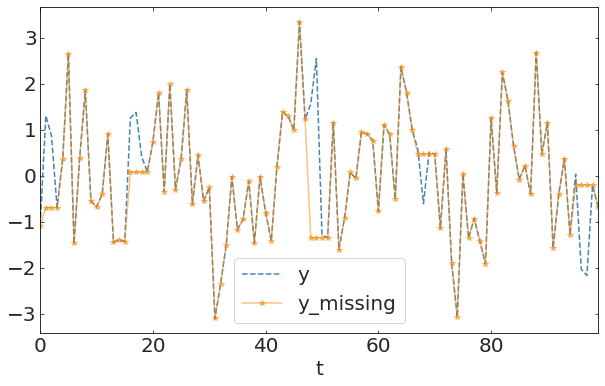

In [123]:
print ("filling schemes:")
print ("original mean\n", df.mean())
print ("original mean\n", df.std())


print ("padding mean\n", df.fillna(method='bfill').mean())
print ("padding mean\n", df.fillna(method='bfill').std())
# same as method='backfill'

ax = df[["y"]].plot(style='--')
df[["y_missing"]].fillna(method='bfill').plot(ax=ax, style='*-', alpha=0.5)


filling schemes:
original mean
 y                       0.027109
y_missing              -0.018973
y_limitesSensitivity    0.162738
y_censored             -0.139607
dtype: float64
original mean
 y                       1.317880
y_missing               1.308035
y_limitesSensitivity    1.202674
y_censored              1.171653
dtype: float64
padding mean
 y                       0.027109
y_missing              -0.018973
y_limitesSensitivity    0.162738
y_censored             -0.139607
dtype: float64
padding mean
 y                       1.317880
y_missing               1.212024
y_limitesSensitivity    1.171910
y_censored              1.135593
dtype: float64


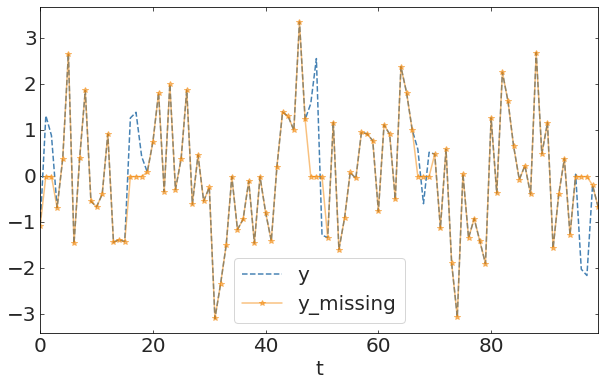

In [124]:
print ("filling schemes:")
print ("original mean\n", df.mean())
print ("original mean\n", df.std())


print ("padding mean\n", df.fillna(df.mean()).mean())
print ("padding mean\n", df.fillna(df.mean()).std())
# same as method='backfill'

ax = df[["y"]].plot(style='--')
df[["y_missing"]].fillna(df.mean()).plot(ax=ax, style='*-', alpha=0.5)


interpolation scheme:
original mean
 y                       0.027109
y_missing              -0.018973
y_limitesSensitivity    0.162738
y_censored             -0.139607
dtype: float64
original mean
 y                       1.317880
y_missing               1.308035
y_limitesSensitivity    1.202674
y_censored              1.171653
dtype: float64
linear interpolation
 y                       0.027109
y_missing              -0.056834
y_limitesSensitivity    0.125851
y_censored             -0.111352
dtype: float64
linear interpolation
 y                       1.317880
y_missing               1.241968
y_limitesSensitivity    1.186753
y_censored              1.148575
dtype: float64


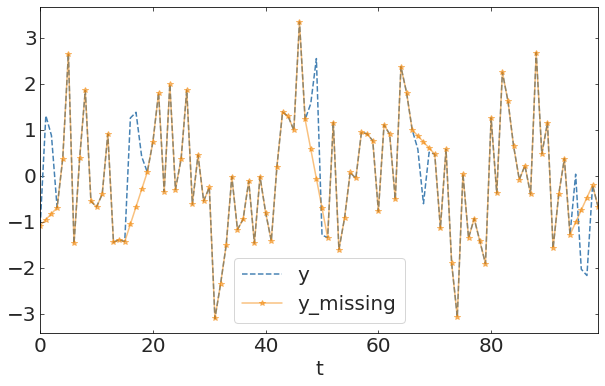

In [129]:
print ("interpolation scheme:")
print ("original mean\n", df.mean())
print ("original mean\n", df.std())


print ("linear interpolation\n", df.interpolate().mean())
print ("linear interpolation\n", df.interpolate().std())
# same as method='backfill'

ax = df[["y"]].plot(style='--')
df.interpolate()[["y_missing"]].plot(ax=ax, style='*-', alpha=0.5)



interpolation schemes:
original mean
 y                       0.027109
y_missing              -0.018973
y_limitesSensitivity    0.162738
y_censored             -0.139607
dtype: float64
original mean
 y                       1.317880
y_missing               1.308035
y_limitesSensitivity    1.202674
y_censored              1.171653
dtype: float64
quadratic interpolation
 y                       0.027109
y_missing              -0.138642
y_limitesSensitivity    0.128396
y_censored             -0.119682
dtype: float64
quadratic interpolation
 y                       1.317880
y_missing               1.348376
y_limitesSensitivity    1.201353
y_censored              1.145658
dtype: float64


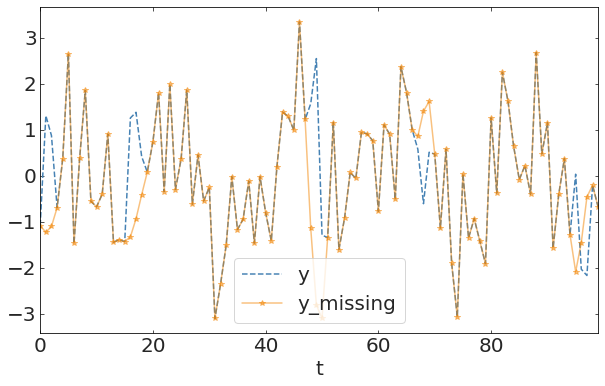

In [128]:
print ("interpolation schemes:")
print ("original mean\n", df.mean())
print ("original mean\n", df.std())


print ("quadratic interpolation\n", 
       df.interpolate(method="quadratic").mean())
print ("quadratic interpolation\n", 
       df.interpolate(method="quadratic").std())
# same as method='backfill'

ax = df[["y"]].plot(style='--')
df.interpolate(method="quadratic")[["y_missing"]].plot(
    ax=ax, style='*-', alpha=0.5)



inpterpolation schemes:
original mean
 y                       0.027109
y_missing              -0.018973
y_limitesSensitivity    0.162738
y_censored             -0.139607
dtype: float64
original mean
 y                       1.317880
y_missing               1.308035
y_limitesSensitivity    1.202674
y_censored              1.171653
dtype: float64
quadratic interpolation
 y                       0.027109
y_missing              -0.110240
y_limitesSensitivity    0.130671
y_censored             -0.120645
dtype: float64
quadratic interpolation
 y                       1.317880
y_missing               1.385112
y_limitesSensitivity    1.203102
y_censored              1.145585
dtype: float64


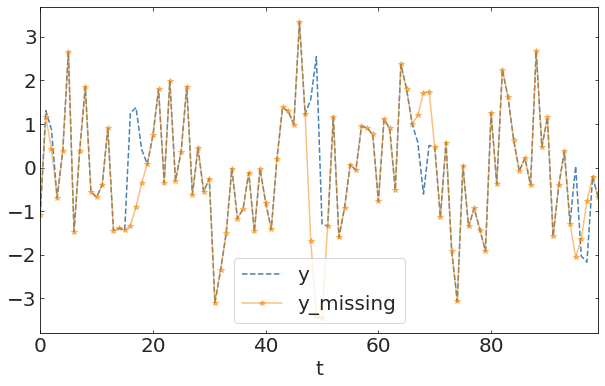

In [130]:
print ("inpterpolation schemes:")
print ("original mean\n", df.mean())
print ("original mean\n", df.std())


print ("quadratic interpolation\n", 
       df.interpolate(method="cubic").mean())
print ("quadratic interpolation\n", 
       df.interpolate(method="cubic").std())
# same as method='backfill'

ax = df[["y"]].plot(style='--')
df.interpolate(method="cubic")[["y_missing"]].plot(
    ax=ax, style='*-', alpha=0.5)
